Shape: (1000, 12)
Target: RainTomorrow
Binary target: True | unique: [0 1]
Train: 311 | Test: 78


C:\Users\RAGHAV ANIL BHISE\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 7, 64)               │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,649 (123.63 KB)

 Trainable params: 31,649 (123.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7312 - loss: 0.6026 - mae: 0.4299 - val_accuracy: 0.7188 - val_loss: 0.6038 - val_mae: 0.3782
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7312 - loss: 0.6003 - mae: 0.3751 - val_accuracy: 0.7188 - val_loss: 0.5937 - val_mae: 0.4056
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7312 - loss: 0.5881 - mae: 0.4062 - val_accuracy: 0.7188 - val_loss: 0.5934 - val_mae: 0.4059
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7312 - loss: 0.5921 - mae: 0.3850 - val_accuracy: 0.7188 - val_loss: 0.5958 - val_mae: 0.3897
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7312 - loss: 0.5876 - mae: 0.4049 - val_accuracy: 0.7188 - val_loss: 0.5946 - val_mae: 0.4138
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7312 - loss: 0.5896 - mae: 0.3968 - val_accuracy: 0.7188 - val_loss: 0.5932 - val_mae: 0.4014
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/

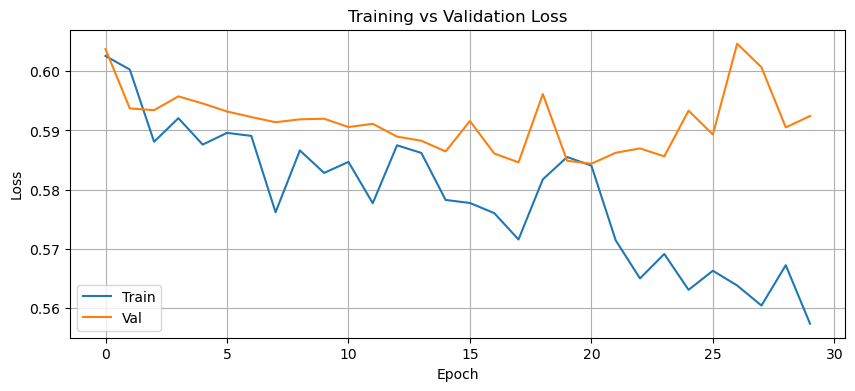

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step

Numeric eval for RainTomorrow: RMSE=0.4596, MAE=0.4085
Classification: Acc=0.7179, Prec=0.0000, Rec=0.0000, F1=0.0000

Sample binary decisions (Actual vs Pred):
    Actual  Pred
0        0     0
1        0     0
2        0     0
3        1     0
4        0     0
5        1     0
6        0     0
7        0     0
8        0     0
9        0     0
10       0     0
11       0     0
12       1     0
13       0     0
14       0     0
15       1     0
16       0     0
17       0     0
18       0     0
19       0     0


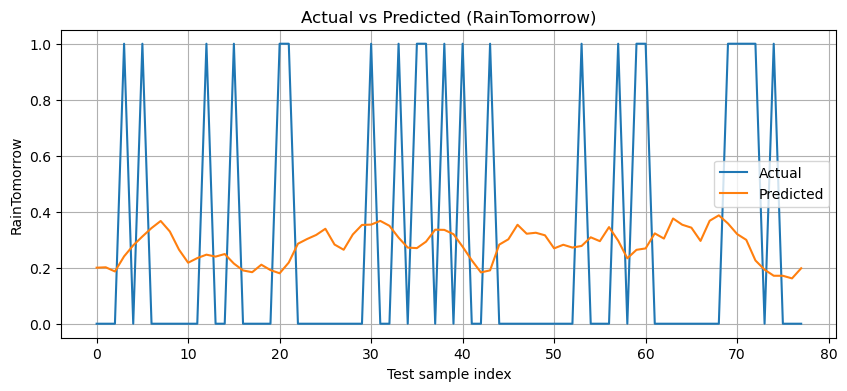

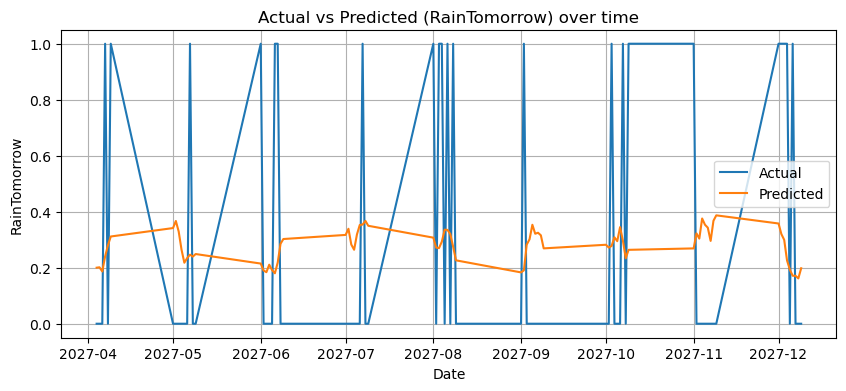

In [11]:
FILE_PATH       = "dataset.csv"   # your CSV
TARGET_COL_NAME = None            # e.g. "RainTomorrow"; if None → last numeric col
WINDOW_SIZE     = 7               # past steps
TEST_RATIO      = 0.2             # last % for test
EPOCHS          = 30
BATCH_SIZE      = 16
THRESH          = 0.5             # 0/1 decision threshold for binary targets
# ------------------------

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

plt.rcParams["figure.figsize"] = (10, 4)

# ---------- LOAD & PREP DATA ----------
df = pd.read_csv(FILE_PATH)
print("Shape:", df.shape)

# date column (optional)
date_col = next((c for c in df.columns if "date" in c.lower() or "time" in c.lower()), None)
if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df = df.dropna(subset=[date_col]).sort_values(date_col).set_index(date_col)
else:
    df = df.sort_index()

# Yes/No → 1/0
for c in df.select_dtypes(include="object"):
    vals = df[c].dropna().str.strip().str.lower().unique()
    if set(vals).issubset({"yes","no","y","n"}):
        df[c] = df[c].str.strip().str.lower().map({"yes":1,"y":1,"no":0,"n":0})

# numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if not num_cols:
    raise ValueError("No numeric columns in file.")
target_col = TARGET_COL_NAME or num_cols[-1]
if target_col not in num_cols:
    raise ValueError(f"Target '{target_col}' is not numeric. Choose from: {num_cols}")
print("Target:", target_col)

# detect binary target
tvals = df[target_col].dropna().unique()
binary_target = np.all(np.isin(tvals, [0,1]))
print("Binary target:", binary_target, "| unique:", tvals)

# feature matrix
X_cols = num_cols
data = df[X_cols].values
mask = ~np.isnan(data).any(axis=1)
data = data[mask]
idx = df.index[mask]

# ---------- SCALE & SEQUENCES ----------
scaler = MinMaxScaler()
data_s = scaler.fit_transform(data)

def make_seq(arr, win, tgt_idx):
    X, y = [], []
    for i in range(len(arr)-win):
        X.append(arr[i:i+win])
        y.append(arr[i+win, tgt_idx])
    return np.array(X), np.array(y)

tgt_idx = X_cols.index(target_col)
X, y = make_seq(data_s, WINDOW_SIZE, tgt_idx)
if len(X) == 0: raise ValueError("Not enough data for chosen WINDOW_SIZE.")

n_train = int(len(X)*(1-TEST_RATIO))
X_tr, X_te = X[:n_train], X[n_train:]
y_tr, y_te = y[:n_train], y[n_train:]
print("Train:", X_tr.shape[0], "| Test:", X_te.shape[0])

# ---------- MODEL ----------
n_steps, n_feat = X_tr.shape[1], X_tr.shape[2]
act = "sigmoid" if binary_target else None
loss = "binary_crossentropy" if binary_target else "mse"
metrics = ["accuracy","mae"] if binary_target else ["mae"]

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(n_steps, n_feat)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation=act)
])
model.compile(optimizer="adam", loss=loss, metrics=metrics)
model.summary()

hist = model.fit(
    X_tr, y_tr,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    verbose=1
)

# ---------- TRAINING CURVE ----------
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_loss"], label="Val")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True); plt.show()

# ---------- PREDICTION & INVERSE SCALE ----------
y_pred_s = model.predict(X_te)

dummy_p = np.zeros((len(y_pred_s), len(X_cols)))
dummy_p[:, tgt_idx] = y_pred_s.ravel()
y_pred = scaler.inverse_transform(dummy_p)[:, tgt_idx]

dummy_t = np.zeros((len(y_te), len(X_cols)))
dummy_t[:, tgt_idx] = y_te
y_true = scaler.inverse_transform(dummy_t)[:, tgt_idx]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)
print(f"\nNumeric eval for {target_col}: RMSE={rmse:.4f}, MAE={mae:.4f}")

# ---------- BINARY METRICS (if applicable) ----------
if binary_target:
    y_true_bin = (y_true >= THRESH).astype(int)   # should already be 0/1
    y_pred_bin = (y_pred >= THRESH).astype(int)
    acc = accuracy_score(y_true_bin, y_pred_bin)
    prec = precision_score(y_true_bin, y_pred_bin, zero_division=0)
    rec = recall_score(y_true_bin, y_pred_bin, zero_division=0)
    f1 = f1_score(y_true_bin, y_pred_bin, zero_division=0)
    print(f"Classification: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")
    print("\nSample binary decisions (Actual vs Pred):")
    print(pd.DataFrame({"Actual": y_true_bin, "Pred": y_pred_bin}).head(20))

# ---------- PLOTS ----------
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title(f"Actual vs Predicted ({target_col})")
plt.xlabel("Test sample index"); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.show()

if date_col:
    all_dates = idx[WINDOW_SIZE:]
    test_dates = all_dates[n_train:]
    if len(test_dates) == len(y_true):
        plt.plot(test_dates, y_true, label="Actual")
        plt.plot(test_dates, y_pred, label="Predicted")
        plt.title(f"Actual vs Predicted ({target_col}) over time")
        plt.xlabel("Date"); plt.ylabel(target_col)
        plt.legend(); plt.grid(True); plt.show()

In [3]:
# ==== Compact SimpleRNN time-series (CSV) ====
FILE_PATH       = "dataset.csv"
TARGET_COL_NAME = None      # e.g. "RainTomorrow"; None → last numeric col
WINDOW_SIZE     = 7
TEST_RATIO      = 0.2
EPOCHS          = 30
BATCH_SIZE      = 16
THRESH          = 0.5       # for binary targets

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

plt.rcParams["figure.figsize"] = (10,4)

# --- load & prep ---
df = pd.read_csv(FILE_PATH)
date_col = next((c for c in df.columns if "date" in c.lower() or "time" in c.lower()), None)
if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df = df.dropna(subset=[date_col]).sort_values(date_col).set_index(date_col)
else:
    df = df.sort_index()

for c in df.select_dtypes(include="object"):
    v = df[c].dropna().str.strip().str.lower()
    if set(v.unique()) <= {"yes","no","y","n"}:
        df[c] = v.map({"yes":1,"y":1,"no":0,"n":0})

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if not num_cols: raise ValueError("No numeric columns in file.")
target_col = TARGET_COL_NAME or num_cols[-1]
if target_col not in num_cols: raise ValueError(f"Bad target: {target_col}")
print("Target:", target_col)

tvals   = df[target_col].dropna().unique()
binary  = set(tvals) <= {0,1}
print("Binary target:", binary, "| unique:", tvals)

X_cols = num_cols
data   = df[X_cols].values
mask   = ~np.isnan(data).any(axis=1)
data   = data[mask]
idx    = df.index[mask]

# --- scale & sequences ---
scaler = MinMaxScaler()
data_s = scaler.fit_transform(data)

def make_seq(a, win, tidx):
    X, y = [], []
    for i in range(len(a)-win):
        X.append(a[i:i+win]); y.append(a[i+win, tidx])
    return np.array(X), np.array(y)

tidx      = X_cols.index(target_col)
X, y      = make_seq(data_s, WINDOW_SIZE, tidx)
if len(X) == 0: raise ValueError("Not enough data for this WINDOW_SIZE.")
n_tr      = int(len(X)*(1-TEST_RATIO))
X_tr, X_te = X[:n_tr], X[n_tr:]
y_tr, y_te = y[:n_tr], y[n_tr:]
print("Train:", X_tr.shape[0], "| Test:", X_te.shape[0])

# --- model (custom SimpleRNN) ---
steps, feats = X_tr.shape[1], X_tr.shape[2]
act   = "sigmoid" if binary else None
loss  = "binary_crossentropy" if binary else "mse"
mets  = ["accuracy","mae"] if binary else ["mae"]

model = Sequential([
    SimpleRNN(32, return_sequences=True, input_shape=(steps, feats)),
    Dropout(0.2),
    SimpleRNN(16),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1, activation=act)
])
model.compile("adam", loss, mets)
model.summary()

hist = model.fit(X_tr, y_tr, epochs=EPOCHS, batch_size=BATCH_SIZE,
                 validation_split=0.1, verbose=1)

# --- loss curve ---
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_loss"], label="Val")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True); plt.show()

# --- predict & inverse scale ---
y_pred_s = model.predict(X_te)

dummy_p = np.zeros((len(y_pred_s), len(X_cols)))
dummy_p[:, tidx] = y_pred_s.ravel()
y_pred = scaler.inverse_transform(dummy_p)[:, tidx]

dummy_t = np.zeros((len(y_te), len(X_cols)))
dummy_t[:, tidx] = y_te
y_true = scaler.inverse_transform(dummy_t)[:, tidx]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)
print(f"\nNumeric eval ({target_col}): RMSE={rmse:.4f}, MAE={mae:.4f}")

# --- binary metrics (if needed) ---
if binary:
    y_true_bin = (y_true >= THRESH).astype(int)
    y_pred_bin = (y_pred >= THRESH).astype(int)
    acc  = accuracy_score(y_true_bin, y_pred_bin)
    prec = precision_score(y_true_bin, y_pred_bin, zero_division=0)
    rec  = recall_score(y_true_bin, y_pred_bin, zero_division=0)
    f1   = f1_score(y_true_bin, y_pred_bin, zero_division=0)
    print(f"Classification: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

# --- plots ---
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title(f"Actual vs Predicted ({target_col})")
plt.xlabel("Test sample index"); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.show()

if date_col:
    dates_all = idx[WINDOW_SIZE:]
    dates_te  = dates_all[n_tr:]
    if len(dates_te) == len(y_true):
        plt.plot(dates_te, y_true, label="Actual")
        plt.plot(dates_te, y_pred, label="Predicted")
        plt.title(f"Actual vs Predicted ({target_col}) over time")
        plt.xlabel("Date"); plt.ylabel(target_col)
        plt.legend(); plt.grid(True); plt.show()


Target: RainTomorrow
Binary target: True | unique: [0 1]
Train: 311 | Test: 78


C:\Users\RAGHAV ANIL BHISE\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 7, 32)               │           1,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,449 (9.57 KB)

 Trainable params: 2,449 (9.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


ValueError: `loss_weights` must match the number of losses, got 1 losses and 2 weights.

# Assistant
This error occurs because there's a mismatch between the number of loss functions and loss weights in your model compilation. The error message indicates you have 1 loss function but 2 weights.

The issue is likely in this line:

In [4]:
model.compile("adam", loss, mets)


The problem is that you're passing "adam" as a string directly, which is incorrect. The `compile()` method expects an optimizer object or a string that represents an optimizer name, followed by a loss function and metrics.

Would you like me to provide the corrected code for the model compilation?

# User
yes

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 7, 32)               │           1,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,449 (9.57 KB)

 Trainable params: 2,449 (9.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.4122 - loss: 0.8278 - mae: 0.5397 - val_accuracy: 0.7188 - val_loss: 0.6391 - val_mae: 0.4662
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6953 - loss: 0.6282 - mae: 0.4505 - val_accuracy: 0.7188 - val_loss: 0.5991 - val_mae: 0.4180
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7276 - loss: 0.5897 - mae: 0.4099 - val_accuracy: 0.7188 - val_loss: 0.5951 - val_mae: 0.3964
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7312 - loss: 0.5840 - mae: 0.3939 - val_accuracy: 0.7188 - val_loss: 0.5949 - val_mae: 0.3882
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7312 - loss: 0.5844 - mae: 0.3884 - val_accuracy: 0.7188 - val_loss: 0.5939 - val_mae: 0.3876
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7312 - loss: 0.5836 - mae: 0.3892 - val_accuracy: 0.7188 - val_loss: 0.5930 - val_mae: 0.3908
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms

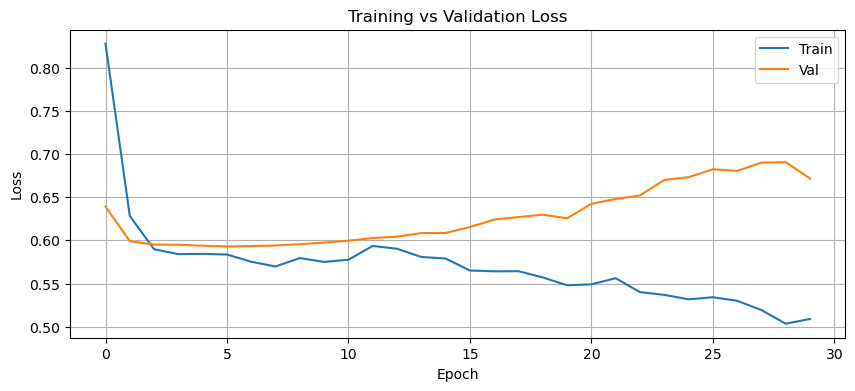

In [5]:
# Assistant
# Correct the model.compile line
model.compile(optimizer="adam", loss=loss, metrics=mets)
model.summary()

hist = model.fit(X_tr, y_tr, epochs=EPOCHS, batch_size=BATCH_SIZE,
                 validation_split=0.1, verbose=1)

# --- loss curve ---
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_loss"], label="Val")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True); plt.show()

# Rest of the code remains the same